In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import metrics
%matplotlib inline


In [2]:
# This dataset consists of SongID, SongTitle and Song Genres. 
SongTitles = pd.read_csv("D:\AI Project\Music_List.csv")
SongTitles['SongID'] = SongTitles['SongID'].astype(str)
SongTitles.head()

,SongID,SongTitle,Genres
0,1,Smells Like Teen Spirit - Nirvana,Classical
1,2,Imagine - John Lennon,Jazz
2,3,One - U2,Instrumental
3,4,Billie Jean - Michael Jackson,Rock
4,5,Bohemian Rhapsody - Queen,Classical


In [3]:
# This dataset consists of UserID, SongID, SongRatings and Song Timestamp. 
SongRating = pd.read_csv('D:\AI Project\Music_Rating.csv')
SongRating['SongID'] = SongRating['SongID'].astype(str)
SongRating.head()

,UserID,SongID,SongRatings,Timestamp
0,1,1,4,964982703
1,1,3,4,964981247
2,1,6,4,964982224
3,1,4,2,964982703
4,1,5,3,964981247


In [4]:
#Used merge on the base of song id to compair songs ratings.
AllSong = pd.merge(SongRating,SongTitles,on='SongID')
AllSong

,UserID,SongID,SongRatings,Timestamp,SongTitle,Genres
0,1,1,4,964982703,Smells Like Teen Spirit - Nirvana,Classical
1,2,1,3,964982703,Smells Like Teen Spirit - Nirvana,Classical
2,1,3,4,964981247,One - U2,Instrumental
3,2,3,5,964981247,One - U2,Instrumental
4,1,6,4,964982224,Hey Jude - The Beatles,Hip Hop
...,...,...,...,...,...,...
93,8,17,4,964982703,Live Forever - Oasis,Classical
94,9,17,1,964982224,Live Forever - Oasis,Classical
95,7,16,5,964981247,The Twist - Chubby Checker,Hip Hop
96,9,16,2,964982224,The Twist - Chubby Checker,Hip Hop


In [5]:
# this task is to predict the Song based on rating.
# reshape(-1,1) it transforms observations into 2D array (specifies one column as many as rows as necessary).  
X = AllSong['SongID'].values.reshape(-1,1)
y = AllSong['SongRatings'].values.reshape(-1,1)

In [6]:
# In this the dataset is splitted into two, 80% of the data is to the training set and remaining 20% to the test set.
#random_state generates a number which decides whether the data should be sent to test or training. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
L_regression=LinearRegression()
# call fit() along with the training data. fit() is used to fit the data.
L_regression.fit(X_train,y_train)

LinearRegression()

In [8]:
# After training the algorithm execute the below expression to make some predictions
# To predict the value use L_regression.pedict on the test data.
y_pred=L_regression.predict(X_test)

In [9]:
#calculate the mean, mean square, root mean square 


# y_test(ground truth)and y_pred(model predictions) compare these by using error metric.
# mean_absolute_error calculates the average of the absolute value of difference between y_test and y_pred.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# mean_squared_error reports the data prediction error.
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
# used to measure the difference between values predicted by model and estimated results.
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.779078297501453
Mean Squared Error: 5.250543773181904
Root Mean Squared Error: 2.291406505441997


In [10]:
# Group by ratings on the base of SongTitle with count.
AllSong.groupby("SongTitle")['SongRatings'].count().sort_values(ascending=False).head()

SongTitle
God Save The Queen - Sex Pistols                14
I Can't Get No Satisfaction - Rolling Stones    12
London Calling - The Clash                      12
Sweet Child O'Mine - Guns N' Roses               7
I Will Always Love You - Whitney Houston         7
Name: SongRatings, dtype: int64

In [11]:
# Group by ratings on the base of SongTitle with mean.
Ratings = pd.DataFrame(AllSong.groupby("SongTitle")['SongRatings'].mean())
Ratings.head()

,SongRatings
SongTitle,
Be My Baby - The Ronettes,5.000000
Billie Jean - Michael Jackson,1.333333
Bohemian Rhapsody - Queen,6.000000
Born To Run - Bruce Springsteen,9.000000
Creep - Radiohead,3.000000


In [12]:
Ratings["RatingCounts"]= pd.DataFrame(AllSong.groupby("SongTitle")['SongRatings'].count())
Ratings.head()

,SongRatings,RatingCounts
SongTitle,,
Be My Baby - The Ronettes,5.000000,1
Billie Jean - Michael Jackson,1.333333,3
Bohemian Rhapsody - Queen,6.000000,2
Born To Run - Bruce Springsteen,9.000000,1
Creep - Radiohead,3.000000,1


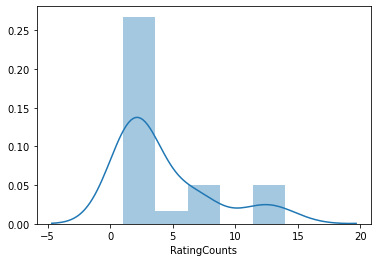

In [13]:
# Plotting Rating count graph 
sns.distplot(Ratings["RatingCounts"])

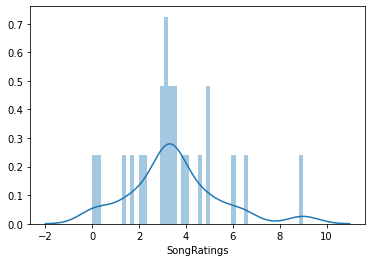

In [14]:
# plt.figure(figsize=(20,10)) on the base of songs rating 
sns.distplot(Ratings["SongRatings"],bins=50)

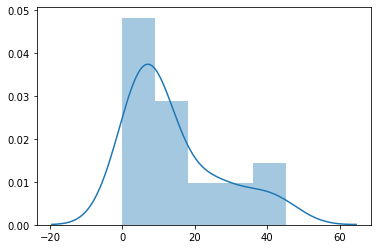

In [15]:
sns.distplot( (Ratings['SongRatings']*Ratings['RatingCounts'] ) )

<Figure size 720x504 with 0 Axes>

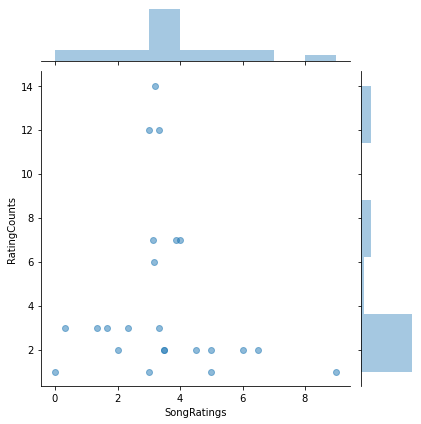

In [16]:
# Below graph shows rating SongRatings vs RatingCounts for analysis
plt.figure(figsize=(10,7))
sns.jointplot(x='SongRatings',y="RatingCounts",data=Ratings,alpha=.5)

In [17]:
AllSong.head()

,UserID,SongID,SongRatings,Timestamp,SongTitle,Genres
0,1,1,4,964982703,Smells Like Teen Spirit - Nirvana,Classical
1,2,1,3,964982703,Smells Like Teen Spirit - Nirvana,Classical
2,1,3,4,964981247,One - U2,Instrumental
3,2,3,5,964981247,One - U2,Instrumental
4,1,6,4,964982224,Hey Jude - The Beatles,Hip Hop


In [18]:
# Below Song Matrix represent all songs rating given by the user 
SongMat = AllSong.pivot_table(values='SongRatings',index='UserID',columns = 'SongTitle')
SongMat.head()

SongTitle,Be My Baby - The Ronettes,Billie Jean - Michael Jackson,Bohemian Rhapsody - Queen,Born To Run - Bruce Springsteen,Creep - Radiohead,God Save The Queen - Sex Pistols,Heartbreak Hotel - Elvis Presley,Hey Jude - The Beatles,Hotel California - The Eagles,I Can't Get No Satisfaction - Rolling Stones,...,Live Forever - Oasis,London Calling - The Clash,One - U2,Over The Rainbow - Judy Garland,Smells Like Teen Spirit - Nirvana,Stairway To Heaven - Led Zeppelin,Sweet Child O'Mine - Guns N' Roses,The Twist - Chubby Checker,Waterloo Sunset - The Kinks,What's Goin' On - Marvin Gaye
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,2.0,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
3,NaN,2.0,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,4.5,NaN,NaN,0.0,3.000000,...,NaN,1.5,NaN,5.0,NaN,4.0,5.0,NaN,2.0,NaN
6,5.0,NaN,NaN,9.0,NaN,2.0,4.0,NaN,0.0,2.333333,...,NaN,4.6,NaN,NaN,NaN,NaN,5.0,NaN,4.0,0.0


In [19]:
# To find to Rating song 
Ratings.sort_values("RatingCounts",ascending=False).head()

,SongRatings,RatingCounts
SongTitle,,
God Save The Queen - Sex Pistols,3.214286,14
I Can't Get No Satisfaction - Rolling Stones,3.000000,12
London Calling - The Clash,3.333333,12
Waterloo Sunset - The Kinks,3.142857,7
Sweet Child O'Mine - Guns N' Roses,3.857143,7


In [20]:
# Consider if user selected a song 'Waterloo Sunset - The Kinks' on that base we are a recommendation of other similar songs
UserChoice = SongMat['Waterloo Sunset - The Kinks']
UserChoice.value_counts()

0.0    1
4.0    1
2.0    1
Name: Waterloo Sunset - The Kinks, dtype: int64

In [21]:
SimilarUserChoice = SongMat.corrwith(UserChoice)
SimilarUserChoice.head()

C:\Users\kadam\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\kadam\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


SongTitle
Be My Baby - The Ronettes         NaN
Billie Jean - Michael Jackson     NaN
Bohemian Rhapsody - Queen         NaN
Born To Run - Bruce Springsteen   NaN
Creep - Radiohead                 NaN
dtype: float64

In [22]:
# Finding Correlation of the song 
corrUserChoice = pd.DataFrame(SimilarUserChoice,columns=['Correlation'])

In [23]:
corrUserChoice.dropna(inplace=True)

In [24]:
# Top Songs on the based on the Correlation
corrUserChoice.sort_values('Correlation',ascending=False).head()

,Correlation
SongTitle,
Over The Rainbow - Judy Garland,1.000000
Waterloo Sunset - The Kinks,1.000000
Sweet Child O'Mine - Guns N' Roses,0.866025
London Calling - The Clash,0.182462
God Save The Queen - Sex Pistols,-0.654654


In [25]:
corrUserChoice= corrUserChoice.join(Ratings["RatingCounts"])
corrUserChoice.head()

,Correlation,RatingCounts
SongTitle,,
God Save The Queen - Sex Pistols,-0.654654,14
Hotel California - The Eagles,-0.866025,3
I Can't Get No Satisfaction - Rolling Stones,-0.993399,12
Like A Rolling Stone - Bob Dylan,-1.000000,6
London Calling - The Clash,0.182462,12


In [26]:
# More than 10 Rating Counts song listed below 
( corrUserChoice[corrUserChoice['RatingCounts']>10] ).sort_values('Correlation',ascending=False).head()

,Correlation,RatingCounts
SongTitle,,
London Calling - The Clash,0.182462,12
God Save The Queen - Sex Pistols,-0.654654,14
I Can't Get No Satisfaction - Rolling Stones,-0.993399,12


In [27]:
# Below listed are similar to user choice 
corrSimilarUserChoice= pd.DataFrame(SimilarUserChoice,columns=["Correlation"])
corrSimilarUserChoice.dropna(inplace=True)
corrSimilarUserChoice.head()

,Correlation
SongTitle,
God Save The Queen - Sex Pistols,-0.654654
Hotel California - The Eagles,-0.866025
I Can't Get No Satisfaction - Rolling Stones,-0.993399
Like A Rolling Stone - Bob Dylan,-1.000000
London Calling - The Clash,0.182462


In [28]:
# Below listed are similar to user choice Sorted based on the Correlation
corrSimilarUserChoice.sort_values("Correlation",ascending=False).head()

,Correlation
SongTitle,
Over The Rainbow - Judy Garland,1.000000
Waterloo Sunset - The Kinks,1.000000
Sweet Child O'Mine - Guns N' Roses,0.866025
London Calling - The Clash,0.182462
God Save The Queen - Sex Pistols,-0.654654


In [29]:
corrSimilarUserChoice=corrSimilarUserChoice.join(Ratings["RatingCounts"])

In [30]:
corrSimilarUserChoice.head()

,Correlation,RatingCounts
SongTitle,,
God Save The Queen - Sex Pistols,-0.654654,14
Hotel California - The Eagles,-0.866025,3
I Can't Get No Satisfaction - Rolling Stones,-0.993399,12
Like A Rolling Stone - Bob Dylan,-1.000000,6
London Calling - The Clash,0.182462,12


In [31]:
corrSimilarUserChoice[corrSimilarUserChoice["RatingCounts"]>10].sort_values('Correlation',ascending=False)

,Correlation,RatingCounts
SongTitle,,
London Calling - The Clash,0.182462,12
God Save The Queen - Sex Pistols,-0.654654,14
I Can't Get No Satisfaction - Rolling Stones,-0.993399,12
